In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [28]:
df = pd.read_csv("../artifacts/data_ingestion/raw.csv")

In [16]:
df.head()

,CustomerID,Name,DATE,BMI,HBA1C,HeartIssues,AnyTransplants,CancerHistory,NumberOfMajorSurgeries,Smoker,Children,Charges,HospitalTier,CityTier,StateID
0,Id1,Ms. Kelly Hawks,12/10/1968,47.410,7.47,No,No,No,0,yes,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,Mr. Matthew D Lehner,8/6/1977,30.360,5.77,No,No,No,0,yes,0,62592.87,tier - 2,tier - 3,R1013
2,Id4,Ms. Kelsey Osborne,6/6/1991,38.095,6.05,No,No,No,0,yes,1,58571.07,tier - 1,tier - 3,R1024
3,Id5,Ms. Kristyn Kadala,19/6/1989,35.530,5.45,No,No,No,0,yes,0,55135.40,tier - 1,tier - 2,R1012
4,Id6,Mr. Russell B. Baker,4/8/1962,32.800,6.59,No,No,No,0,yes,0,52590.83,tier - 1,tier - 3,R1011


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2325 non-null   object 
 1   Name                    2325 non-null   object 
 2   DATE                    2325 non-null   object 
 3   BMI                     2325 non-null   float64
 4   HBA1C                   2325 non-null   float64
 5   HeartIssues             2325 non-null   object 
 6   AnyTransplants          2325 non-null   object 
 7   CancerHistory           2325 non-null   object 
 8   NumberOfMajorSurgeries  2325 non-null   int64  
 9   Smoker                  2325 non-null   object 
 10  Children                2325 non-null   int64  
 11  Charges                 2325 non-null   float64
 12  HospitalTier            2325 non-null   object 
 13  CityTier                2325 non-null   object 
 14  StateID                 2325 non-null   

In [18]:
df['StateID'].unique()

array(['R1013', 'R1024', 'R1012', 'R1011', 'R1016', 'R1015', 'R1017',
       'R1014', 'R1023', 'R1019', 'R1018', 'R1026', 'R1022', 'R1021',
       'R1025', 'R1020'], dtype=object)

In [ ]:
#drop ids , drop names , keep year of date , one hot - heart,transplant,cancer,smoker , heriarchy encode - hospital, city , remove R of state id and make data type as int

In [29]:
df = df.drop(columns=['CustomerID', 'Name'])


In [46]:
HAC = ['HeartIssues', 'AnyTransplants', 'CancerHistory']


In [52]:
for i in HAC:
    df[i] = df[i].map({'No': 0, 'Yes': 1})

In [53]:
df.Smoker.unique()

array(['yes', 'No'], dtype=object)

In [54]:
df['Smoker'] = df['Smoker'].map({'No': 0, 'yes': 1})


In [32]:
df['StateID'] = df['StateID'].str.lstrip('R').astype(int)
df.head()

,DATE,BMI,HBA1C,HeartIssues,AnyTransplants,CancerHistory,NumberOfMajorSurgeries,Smoker,Children,Charges,HospitalTier,CityTier,StateID
0,12/10/1968,47.410,7.47,No,No,No,0,yes,0,63770.43,tier - 1,tier - 3,1013
1,8/6/1977,30.360,5.77,No,No,No,0,yes,0,62592.87,tier - 2,tier - 3,1013
2,6/6/1991,38.095,6.05,No,No,No,0,yes,1,58571.07,tier - 1,tier - 3,1024
3,19/6/1989,35.530,5.45,No,No,No,0,yes,0,55135.40,tier - 1,tier - 2,1012
4,4/8/1962,32.800,6.59,No,No,No,0,yes,0,52590.83,tier - 1,tier - 3,1011


In [33]:
hospital_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}
city_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}
df['HospitalTier'] = df['HospitalTier'].map(hospital_tier_mapping)
df['CityTier'] = df['CityTier'].map(city_tier_mapping)
df.head()

,DATE,BMI,HBA1C,HeartIssues,AnyTransplants,CancerHistory,NumberOfMajorSurgeries,Smoker,Children,Charges,HospitalTier,CityTier,StateID
0,12/10/1968,47.410,7.47,No,No,No,0,yes,0,63770.43,1,3,1013
1,8/6/1977,30.360,5.77,No,No,No,0,yes,0,62592.87,2,3,1013
2,6/6/1991,38.095,6.05,No,No,No,0,yes,1,58571.07,1,3,1024
3,19/6/1989,35.530,5.45,No,No,No,0,yes,0,55135.40,1,2,1012
4,4/8/1962,32.800,6.59,No,No,No,0,yes,0,52590.83,1,3,1011


In [37]:
df['DATE'] = df['DATE'].apply(lambda x: int(x.split('/')[2]))

In [55]:
df.head()

,DATE,BMI,HBA1C,HeartIssues,AnyTransplants,CancerHistory,NumberOfMajorSurgeries,Smoker,Children,Charges,HospitalTier,CityTier,StateID
0,1968,47.410,7.47,0,0,0,0,1,0,63770.43,1,3,1013
1,1977,30.360,5.77,0,0,0,0,1,0,62592.87,2,3,1013
2,1991,38.095,6.05,0,0,0,0,1,1,58571.07,1,3,1024
3,1989,35.530,5.45,0,0,0,0,1,0,55135.40,1,2,1012
4,1962,32.800,6.59,0,0,0,0,1,0,52590.83,1,3,1011


<Axes: >

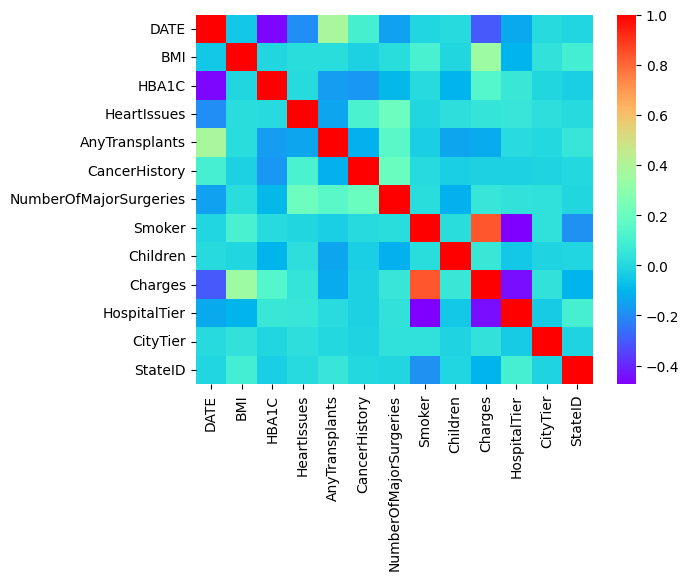

In [57]:
sns.heatmap(df.corr(), cmap='rainbow')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    2325 non-null   int64  
 1   BMI                     2325 non-null   float64
 2   HBA1C                   2325 non-null   float64
 3   HeartIssues             2325 non-null   int64  
 4   AnyTransplants          2325 non-null   int64  
 5   CancerHistory           2325 non-null   int64  
 6   NumberOfMajorSurgeries  2325 non-null   int64  
 7   Smoker                  2325 non-null   int64  
 8   Children                2325 non-null   int64  
 9   Charges                 2325 non-null   float64
 10  HospitalTier            2325 non-null   int64  
 11  CityTier                2325 non-null   int64  
 12  StateID                 2325 non-null   int32  
dtypes: float64(3), int32(1), int64(9)
memory usage: 227.2 KB
